(using all available features)

DecisionTree classifier and max_depth analyser 

# best max_depth is 8

In [62]:
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

In [63]:
# load data
df = pd.read_csv('./Data_income/clean_data',index_col=0)
df.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Y', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife'],
      dtype='object')

In [65]:
corr_matrix = df.corr()
print(corr_matrix["Y"].sort_values(ascending=False))

Y                                        1.000000
marital-status_ Married-civ-spouse       0.445853
relationship_ Husband                    0.403791
occupation                               0.344212
education-num                            0.332613
age                                      0.230369
hours-per-week                           0.227687
capital-gain                             0.223013
sex                                      0.214628
workclass                                0.170452
capital-loss                             0.147554
relationship_ Wife                       0.120484
race                                     0.096204
native-country                           0.094950
marital-status_ Married-AF-spouse        0.008977
fnlwgt                                  -0.006339
marital-status_ Married-spouse-absent   -0.039303
marital-status_ Widowed                 -0.065050
marital-status_ Separated               -0.073583
relationship_ Other-relative            -0.085601


In [66]:
lst1 = list(df.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

# Separate out the target

In [67]:
X = df[lst1]
y = df['Y']
X.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
dtreemodel.classes_

array([0, 1])

In [74]:
# lst2 = (list(dtreemodel.feature_importances_))
# lst2
# dict1 = dict(zip(lst1,lst2))
# print(dict1)

In [72]:
lst2

[0.11365127757117835,
 0.029338803281809874,
 0.20586325899460986,
 0.1226049500563262,
 0.06231395387371,
 0.01298103208283636,
 0.0071394948435766796,
 0.10602190944239047,
 0.037769227787186374,
 0.0670190745652126,
 0.01528141731795628,
 0.002543425198077523,
 0.0005038557445468565,
 0.20072007090596058,
 0.0005121714019506308,
 0.001391535675375762,
 0.0008800654929064645,
 0.0013524537317184115,
 0.003280837072582176,
 0.001170820870353772,
 0.0009526560507739912,
 0.001304719567971233,
 0.0014631214891886134,
 0.0039398669818009125]

In [75]:
predictions = dtreemodel.predict(X_test)

In [76]:
dtreemodel.score(X_test, y_test)

0.8154644100184263

In [77]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 25))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

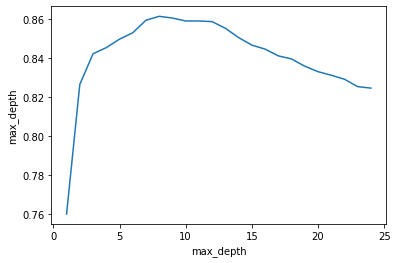

In [78]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lst1 = [3,4,5,6,7,8,9,10,11,12,13,15,16]

max_depth =[]
Accuracy = []
reacll_Pos = []
recall_Neg = []

def DTree1(lst1):
    for i in lst1:
        dtreemodel = DecisionTreeClassifier(max_depth=i)
        # Fit the model using the training data
        # X_train -> parameter supplies the data features
        # y_train -> parameter supplies the target labels
        dtreemodel.fit(X_train, y_train)

        predictions = dtreemodel.predict(X_test)
        
        tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
        
        print(f'max_depth : {i}')
        print(f" Accuracy : %.4f" % accuracy_score(y_test, predictions))
        print(f'recall_1s : %.2f' % (tp/(tp+fn)))
        print(f'recall_0s : %.2f' % (tn/(tn+fp)))

DTree1(lst1)

max_depth : 3
 Accuracy : 0.8454
recall_1s : 0.55
recall_0s : 0.94
max_depth : 4
 Accuracy : 0.8490
recall_1s : 0.51
recall_0s : 0.96
max_depth : 5
 Accuracy : 0.8537
recall_1s : 0.53
recall_0s : 0.96
max_depth : 6
 Accuracy : 0.8554
recall_1s : 0.54
recall_0s : 0.96
max_depth : 7
 Accuracy : 0.8561
recall_1s : 0.55
recall_0s : 0.95
max_depth : 8
 Accuracy : 0.8638
recall_1s : 0.62
recall_0s : 0.94
max_depth : 9
 Accuracy : 0.8626
recall_1s : 0.64
recall_0s : 0.94
max_depth : 10
 Accuracy : 0.8596
recall_1s : 0.62
recall_0s : 0.94
max_depth : 11
 Accuracy : 0.8589
recall_1s : 0.63
recall_0s : 0.93
max_depth : 12
 Accuracy : 0.8548
recall_1s : 0.62
recall_0s : 0.93
max_depth : 13
 Accuracy : 0.8521
recall_1s : 0.61
recall_0s : 0.93
max_depth : 15
 Accuracy : 0.8485
recall_1s : 0.62
recall_0s : 0.92
max_depth : 16
 Accuracy : 0.8444
recall_1s : 0.62
recall_0s : 0.91


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lst1 = [3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25]

max_depth =[]
Accuracy = []
recall_1s = []
recall_0s = []

def DTree1(lst1):
    for i in lst1:
        dtreemodel = DecisionTreeClassifier(max_depth=i)
        # Fit the model using the training data
        # X_train -> parameter supplies the data features
        # y_train -> parameter supplies the target labels
        dtreemodel.fit(X_train, y_train)

        predictions = dtreemodel.predict(X_test)
        
        tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
        
        max_depth.append(i)
        Accuracy.append((accuracy_score(y_test, predictions)))
        recall_1s.append((tp/(tp+fn)))
        recall_0s.append((tn/(tn+fp)))
        
DTree1(lst1)

In [58]:

dict1 = {'max_depth': max_depth , 'Accuracy': Accuracy, 'recall_1s': recall_1s,'recall_0s': recall_0s}  


    
df = pd.DataFrame(dict1) 
    
df  

,max_depth,Accuracy,recall_1s,recall_0s
0,3,0.845356,0.554558,0.938853
1,4,0.849041,0.506031,0.959325
2,5,0.853545,0.531837,0.956981
3,6,0.855251,0.538569,0.957071
4,7,0.856070,0.548668,0.954906
5,8,0.863509,0.623562,0.940657
6,9,0.862963,0.635063,0.936237
7,10,0.859824,0.619916,0.936959
8,11,0.859346,0.630295,0.932991
9,12,0.854501,0.619355,0.930105


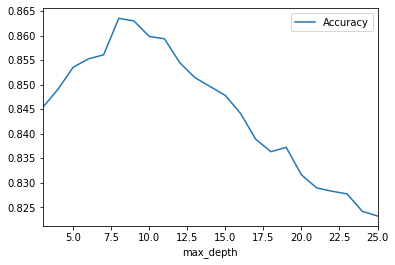

In [59]:
df.plot(x='max_depth', y='Accuracy')

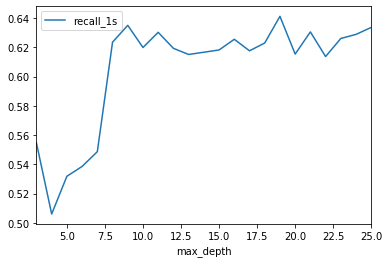

In [60]:
df.plot(x='max_depth', y='recall_1s')

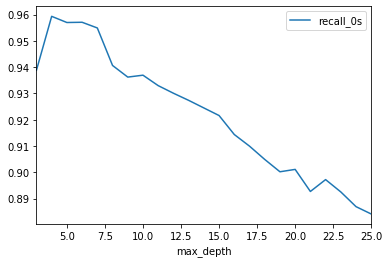

In [61]:
df.plot(x='max_depth', y='recall_0s')

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



dtreemodel = DecisionTreeClassifier(max_depth=9)
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()


print(f" Accuracy : %.4f" % accuracy_score(y_test, predictions))
print(f'recall_1s : %.2f' % (tp/(tp+fn)))
print(f'recall_0s : %.2f' % (tn/(tn+fp)))


 Accuracy : 0.8611
recall_1s : 0.61
recall_0s : 0.94


In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11135
           1       0.76      0.61      0.68      3518

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.86      0.86      0.86     14653



In [82]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2147, 664]
[1371, 10471]


In [83]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.13887941035965332